**Fake News Classifier**: Text classification model to detect fake news articles!

**Dataset**: [Kaggle Fake and real news dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)

In [ ]:
# !pip install --upgrade git+https://github.com/fastai/fastai.git # from github

In [ ]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

import fastai
from fastai.text.all import *
from fastai.imports import *

from google.colab import files
from sklearn.metrics import roc_curve, auc

In [ ]:
fastai.__version__

'2.5.6'

# Upload dataset

In [ ]:
os.makedirs('data', exist_ok=True)

os.chdir('data') # change directory to data
files.upload()
os.chdir('/content') # change directory 

Saving True.csv to True.csv
Saving Fake.csv to Fake.csv


# Dataset

In [ ]:
def read_csv(file):
  return pd.read_csv(file, encoding='UTF-8', low_memory=False)

DATASET_DIRECTORY = 'data'
true_df = read_csv(f'{DATASET_DIRECTORY}/True.csv')
fake_df = read_csv(f'{DATASET_DIRECTORY}/Fake.csv')

In [ ]:
true_df.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text  \
0  WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a figh...   
1  WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not chal...   
2  WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. “This investigation will go forward. It will be an investigation ...   
3  WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported on Saturday. The conversation between Papadopoulos and the diplomat, Alexander Downer, in London was a driving factor behind the FBI’s decision to open a counter-intelligence investigation of Moscow’s contacts with the Trump campaign, the Times reported. Two months after the meeting, Australian officials passed the information that came from Papadopoulos to their American co...   
4  SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to ship packages for Amazon (AMZN.O), picking another fight with an online retail giant he has criticized in the past.     “Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE!” Trump wrote on Twitter.  The president’s tweet drew fresh attention to the fragile fi

In [ ]:
# add is_fake column
true_df['is_fake'] = 0;

In [ ]:
fake_df.head()

title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text  \
0  Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of m...   
1  House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoul...   
2  On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In January, there was a brief run-in on a plane between Clarke and fellow passenger Dan Black, who he later had detained by the police for no reason whatsoever, except that maybe his feelings were hurt. Clarke messaged the police to stop Black after he deplaned, and now, a search warrant has been executed by the FBI to see the exchanges.Clarke is calling it fake news even though copies of the search...   
3  On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH  Philip Bump (@pbump) December 29, 2017 That makes what a Washingt...   
4  Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivered his message just days after members of the United Nations condemned Trump s move to recognize Jerusalem as the capital of Israel. The Pontiff prayed on Monday for the  peaceful coexistence of two states within mutually agreed and internationally recognized borders. We see Jesus in the children of the Middle East who continue to suffer because 

In [ ]:
# add is_fake column
fake_df['is_fake'] = 1

In [ ]:
train_df = pd.concat([true_df, fake_df], axis=0) # concat fake_df and true_df
train_df['text'] = train_df['title'] +  " \n " + train_df['text'] # concat title and text
train_df.drop(['title', 'subject', 'date'], axis=1)

text  \
0      As U.S. budget fight looms, Republicans flip their fiscal script \n WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wedne...   
1      U.S. military to accept transgender recruits on Monday: Pentagon \n WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1....   
2      Senior U.S. Republican senator: 'Let Mr. Mueller do his job' \n WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. “...   
3      FBI Russia probe helped by Australian diplomat tip-off: NYT \n WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported on Saturday. The conversation between Papadopoulos and the diplomat, Alexander Downer, in London was a driving factor behind the FBI’s decision to open a counter-intelligence investigation of Moscow’s contacts with the Trump campaign, the Times reported. Two months after the meeting, Australian officials passed t...   
4      Trump wants Postal Service to charge 'much more' for Amazon shipments \n SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to ship packages for Amazon (AMZN.O), picking another fight with an online retail giant he has criticized in the past.     “Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE!” Trump wrote on Twitter.  The pr...   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        ...   
23476  McPain: John McCain Furious That Iran Treated US Sailors Well \n 21st Century Wire says As 21WIRE reported earlier this week, the unlikely  mishap  of two US Naval vessels straying into Iranian waters   just hours before the President s State of the Union speech, followed by the usual parade of arch-neocons coming on TV in 

# Dataloaders (Language Model)

In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 5.1 MB/s 


In [ ]:
def get_dls(bs, is_lm=False, seq_len=72, vocab=None):
  set_seed(42, reproducible=True)
  if is_lm:
    dls = DataBlock(
      blocks=(TextBlock.from_df('text', is_lm=is_lm, tok=SentencePieceTokenizer())),
      get_x=ColReader('text'),
      splitter=RandomSplitter(0.1)
    ).dataloaders(train_df, bs=bs, seq_len=seq_len)
  elif not is_lm and vocab:
    dls = DataBlock(
      blocks=(TextBlock.from_df('text', vocab=vocab, is_lm=is_lm, tok=SentencePieceTokenizer()), CategoryBlock),
      get_x=ColReader('text'),
      get_y=ColReader('is_fake'),
      splitter=TrainTestSplitter(stratify=train_df['is_fake'])
    ).dataloaders(train_df, bs=bs, seq_len=seq_len)
  
  return dls

In [ ]:
dls_lm = get_dls(bs=64, is_lm=True, seq_len=80)

In [ ]:
dls_lm.show_batch(max_n=2)

# Interpretation Utilies

In [ ]:
def get_classification_interpretation(learn):
  return ClassificationInterpretation.from_learner(learn)

def plot_top_losses(interp, k=9, nrows=3):
  interp.plot_top_losses(k, nrows=nrows)

def plot_confusion_matrix(interp, figsize=(12, 12), dpi=60):
  interp.plot_confusion_matrix(figsize=figsize, dpi=dpi)

def print_classification_report(interp):
  interp.print_classification_report()

# Fine-Tuning the Language Model

In [ ]:
learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.3, 
    metrics=[accuracy, Perplexity()]).to_fp16()

SuggestedLRs(valley=0.013182567432522774)

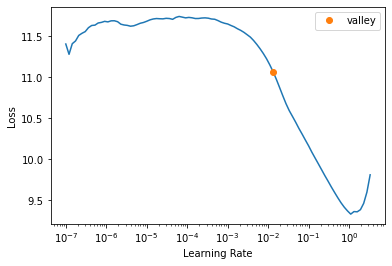

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(3, 1e-2, cbs=SaveModelCallback(monitor='valid_loss', fname='awd-lstm-stage-1'))

Better model found at epoch 0 with valid_loss value: 3.7720696926116943.
Better model found at epoch 1 with valid_loss value: 3.558650016784668.
Better model found at epoch 2 with valid_loss value: 3.486111879348755.


In [ ]:
learn = learn.load('awd-lstm-stage-1')

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(3, lr_max=slice(1e-6, 1e-3), cbs=SaveModelCallback(monitor='valid_loss', fname='awd-lstm-stage-2'))

Better model found at epoch 0 with valid_loss value: 3.409632921218872.
Better model found at epoch 1 with valid_loss value: 3.3644466400146484.
Better model found at epoch 2 with valid_loss value: 3.3544397354125977.


In [ ]:
learn = learn.load('awd-lstm-stage-2')
learn.save_encoder('awd-lstm-finetuned')

# Dataloaders (Classifier)

In [ ]:
dls_clas = get_dls(bs=64, is_lm=False, seq_len=80, vocab=dls_lm.vocab)

In [ ]:
dls_clas.show_batch(max_n=3)

# Fine-Tuning the classifier

In [ ]:
learn = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5, metrics=accuracy).to_fp16()

In [ ]:
learn = learn.load_encoder('awd-lstm-finetuned')

SuggestedLRs(valley=0.0020892962347716093)

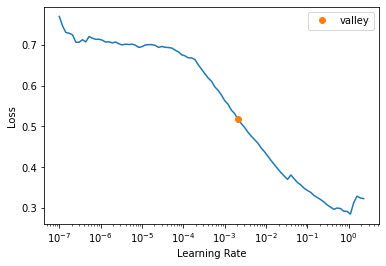

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(1, 1e-3, cbs=SaveModelCallback(monitor='valid_loss', fname='awd-lstm-text-classifier-stage-1'))

Better model found at epoch 0 with valid_loss value: 0.006499091163277626.


In [ ]:
# freeze all except the last two parameter groups and finetune
learn.freeze_to(-2)
learn.fit_one_cycle(1, lr_max=slice(1e-2/(2.6**4),1e-2), cbs=SaveModelCallback(monitor='valid_loss', fname='awd-lstm-text-classifier-stage-2'))

Better model found at epoch 0 with valid_loss value: 0.006911424454301596.


In [ ]:
# freeze all except the last three parameter groups and finetune
learn.freeze_to(-3)
learn.fit_one_cycle(1, lr_max=slice(5e-3/(2.6**4),5e-3), cbs=SaveModelCallback(monitor='valid_loss', fname='awd-lstm-text-classifier-stage-3'))

Better model found at epoch 0 with valid_loss value: 0.0010730033973231912.


In [ ]:
# freeze the whole model and finetune
learn.load('awd-lstm-text-classifier-stage-3')
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(1e-3/(2.6**4),1e-3), cbs=SaveModelCallback(monitor='valid_loss', fname='awd-lstm-text-classifier-stage-4'))

Better model found at epoch 0 with valid_loss value: 0.0008106339373625815.
Better model found at epoch 1 with valid_loss value: 0.0007553881732746959.


In [ ]:
learn = learn.load('awd-lstm-text-classifier-stage-4')
learn.show_results()

## Interpretation

In [ ]:
learn = learn.load('awd-lstm-text-classifier-stage-4')
interp = get_classification_interpretation(learn)

In [ ]:
# top losses
plot_top_losses(interp)

In [ ]:
# classification report
print_classification_report(interp)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



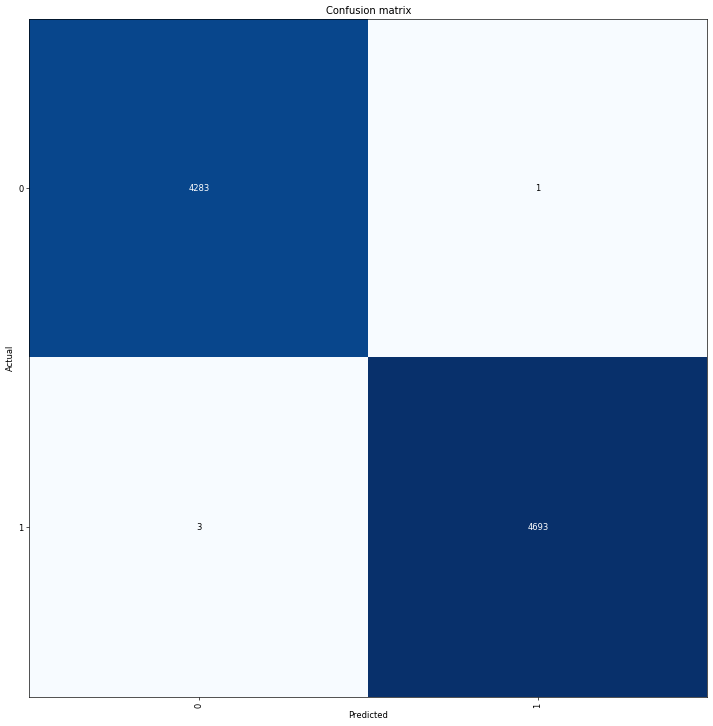

In [ ]:
# confusion matrix
plot_confusion_matrix(interp, figsize=(12, 12))

## Examples of Misclassified labels

Factbox: Trump Supreme Court appointee to affect pending cases

Neil Gorsuch, President Donald Trump’s appointee to the U.S. Supreme Court who was confirmed by the Senate to the lifetime job on Friday in a 54-45 vote, will have an immediate impact on cases already pending before the justices. The nine-seat court has operated with only eight justices after the death of conservative Antonin Scalia on Feb. 13, 2016, with four liberals and four conservatives. Gorsuch’s confirmation restores a 5-4 conservative majority. The new justice could cast the deciding vote in new cases before the court as well as some cases already argued during the current term that ends in June. The court could decide to hear fresh arguments in cases in which they otherwise would be split 4-4. Here is a list of five such cases in which Gorsuch could be pivotal. Religious rights: Trinity Lutheran Church v. Comer A case from Missouri to be argued on April 19 in which a church contends the state violated the U.S. Constitution’s First Amendment guarantee of religious freedom by denying it funds for a playground project because of a state ban on aid to religious organizations. Employee class-action lawsuits: Epic Systems Corp v. Lewis A significant case for business and labor on whether companies can head off costly class-action lawsuits by forcing employees to give up their right to pursue work-related legal claims as a group in court. An issue that has divided the court in the past, this case is set to be argued in the next term, which starts in October. Housing discrimination: Bank of America v. Miami The eight-justice court appeared closely divided when it heard arguments on Nov. 8 on whether the city of Miami could pursue lawsuits accusing major banks of predatory mortgage lending to black and Hispanic home buyers. The court may need to reargue the case with Gorsuch on board to avoid a 4-4 split. Cross-border shooting: Hernandez v. Mesa A 4-4 split appeared possible when the court heard arguments in this civil rights case on Feb. 21. The court has been asked to revive a civil rights lawsuit filed by the family of a Mexican teenager against a U.S. Border Patrol agent who fatally shot the 15-year-old from across the border in Texas in 2010. Corporate liability: Jesner v. Arab Bank In a case to be heard next term, the court agreed on Monday to consider reviving litigation that seeks to hold Arab Bank Plc ARBK.AM financially liable for militant attacks in Israel and the Palestinian territories and accuses the Jordan-based bank of being the “paymaster” to militant groups. The question of whether companies can be held liable for actions overseas under a federal law called the Alien Tort Statute is one the court also took up in 2013 but failed to decide.


- **Category**: politicsNews
- **Date**: April 7, 2017
- **Target** : Not Fake News
- **Prediction** : Fake News

# ROC curve

In [ ]:
preds, y, loss = learn.get_preds(with_loss=True)

In [ ]:
probs = np.exp(preds[:, 1])

# compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)
roc_auc = auc(fpr, tpr)

print('ROC are is {}'.format(roc_auc))

ROC are is 0.9999998508773185


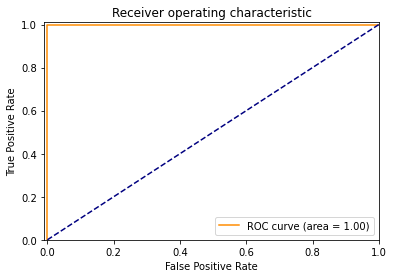

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")